In [103]:
import re
import pandas as pd
import seaborn as sns
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

sns.set()

In [104]:
fipe =  pd.read_csv('FIPE.csv')

In [105]:
fipe.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241099 entries, 0 to 3241098
Data columns (total 9 columns):
CodFipe          object
AnoModelo        object
Combustivel      object
DataConsulta     object
Marca            object
MesReferencia    object
Modelo           object
TipoVeiculo      int64
Valor            object
dtypes: int64(1), object(8)
memory usage: 222.5+ MB


In [106]:
fipe['Valor'] = fipe['Valor'].apply(lambda x :re.search(r'[\d.]+',x.split(',')[0]).group().replace('.','')).astype(float)

In [107]:
fipe['Ano'] = fipe['MesReferencia'].apply(lambda x: x.split('-')[0])
fipe['Mes'] = fipe['MesReferencia'].apply(lambda x: x.split('-')[1])

In [108]:
fipe.drop(columns=['CodFipe','DataConsulta'], inplace=True)

In [109]:
fipe_carro = fipe.query(" Valor < 500000 and TipoVeiculo==1 ")

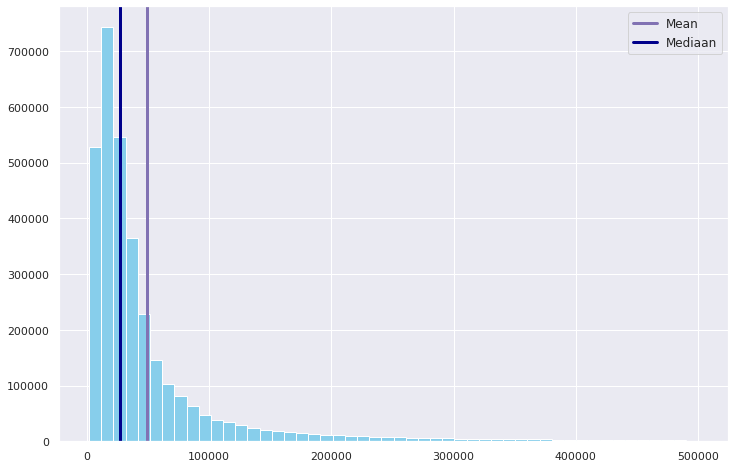

In [110]:
fig = plt.figure(figsize=(12,8))
plt.hist(fipe_carro.Valor , bins=50, color='skyblue')
plt.axvline(fipe_carro.Valor.mean() , color='m', lw=3 , label ='Mean');
plt.axvline(fipe_carro.Valor.median() , color='darkblue' , lw=3, label ='Mediaan');
plt.legend(fontsize=12);

In [111]:
por_marca = fipe_carro.groupby('Marca')['Valor'].mean().sort_values(ascending=False)

In [112]:
# marcas com media de preço mais altas e mais baixas
top10_caros= por_marca[:20]
top10_baratos = por_marca[-20:][::-1]

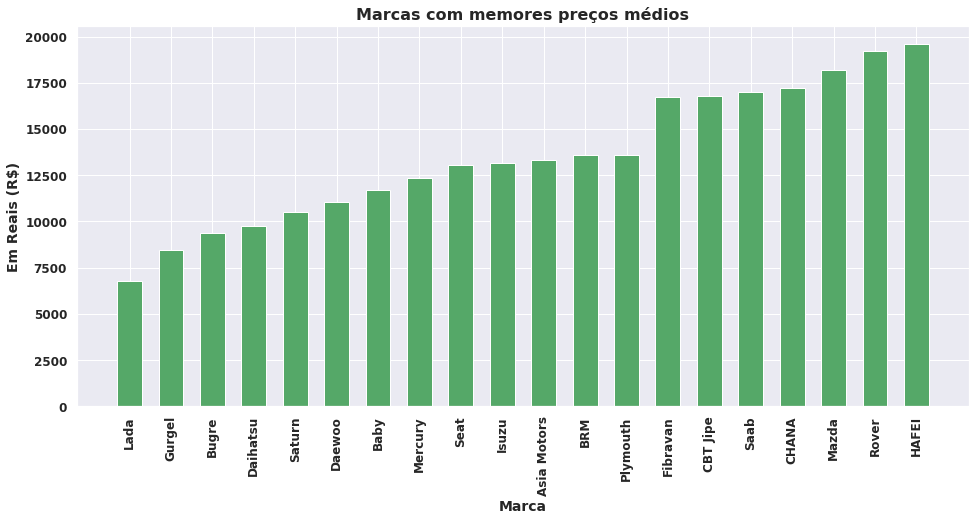

In [113]:
# plot
fig, ax = plt.subplots(figsize=(16,7));

ax.bar(top10_baratos.index,top10_baratos.values,color='g', width=0.6)

plt.xlabel('Marca', {'weight':'bold', 'fontsize': 14 })
plt.ylabel('Em Reais (R$)', {'weight':'bold', 'fontsize': 14  })

plt.xticks( rotation='vertical' , fontsize=12, weight='bold');
plt.yticks(fontsize=12, weight='bold');
plt.title("Marcas com memores preços médios", fontsize=16, weight='bold');

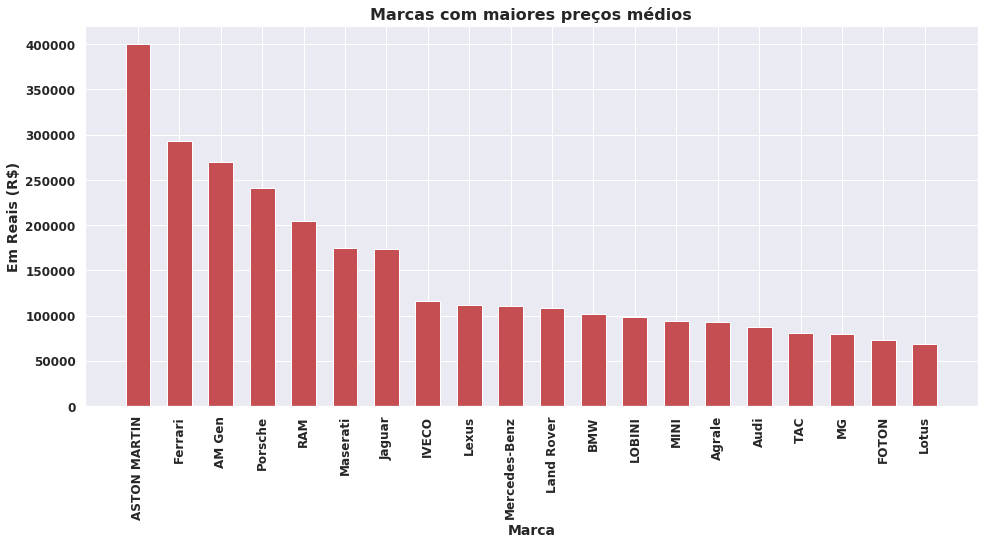

In [114]:
# plot
fig, ax = plt.subplots(figsize=(16,7));

ax.bar(top10_caros.index,top10_caros.values,color='r', width=0.6)

plt.xlabel('Marca', {'weight':'bold', 'fontsize': 14 })
plt.ylabel('Em Reais (R$)', {'weight':'bold', 'fontsize': 14  })

plt.xticks( rotation='vertical' , fontsize=12, weight='bold');
plt.yticks(fontsize=12, weight='bold');
plt.title("Marcas com maiores preços médios", fontsize=16, weight='bold');

# valor de depreciação  medio???

In [115]:
def plot_charts(df, cor='blue'):
    fig, axes = plt.subplots(1, len(df.AnoModelo.value_counts().index.sort_values()), figsize=(28,8))

    for i,ano in enumerate(df.AnoModelo.value_counts().index.sort_values()):
        aux = df.query(" AnoModelo =='{}'".format(ano)).sort_values(['AnoModelo','Ano','Mes'])
        axes[i].plot(aux.Valor.values , color=cor, label='Reais(R$)')
        axes[i].set_title("{}-{} ".format(aux.Modelo.values[0][:-9],ano), fontsize=12, weight='bold');

        axes[i].set_xticks(range(len(aux.MesReferencia.values)))
        axes[i].set_xticklabels(aux.MesReferencia.values,rotation=90, fontsize=12, weight='bold')
        axes[i].yaxis.set_tick_params(labelsize=12)

    plt.legend(fontsize=14);

In [116]:
global mais_vendidos

mais_vendidos=['Onix','HB20','Ka','Ka Sedan','Gol','Sandero','Prisma','Corolla','Mobi','Compass',\
              'HR-V','Fox','Etios','Voyage','Creta','Uno','Renegade','Up','Kicks','Siena','Kwid','Fit']

In [117]:
def populares(row):
    count=0
    for m in mais_vendidos:
        try:
            re.search(r'[\s]*{}[\s]'.format(m.lower()), row.lower()).group()
        except:
            pass
        else:
            count+=1
            break
        
    if count !=0:
        return 1
    else:
        return 0

In [118]:
fipe_carro_recente=fipe_carro.query("Ano=='2017' or Ano=='2018' or Ano=='2019' ").copy()

In [119]:
fipe_carro_recente['Popular'] = fipe_carro_recente['Modelo'].apply(lambda m: populares(m))

In [120]:
fipe_carro_recente = fipe_carro_recente.query("Popular==1 and (AnoModelo=='2017' or AnoModelo=='2018' or AnoModelo=='2019')")

In [121]:
fipe_carro_recente.Modelo.value_counts()[:60]

ETIOS PLATINUM Sed. 1.5 Flex 16V 4p Aut.    75
ETIOS X Sedan 1.5 Flex 16V 4p Mec.          75
ETIOS XLS 1.5 Flex 5p Aut.                  75
ETIOS XLS Sedan 1.5 Flex 16V 4p Aut.        75
ETIOS X 1.3 Flex 16V 5p Aut.                75
ETIOS X 1.3 Flex 16V 5p Mec.                75
ETIOS PLATINUM 1.5 Flex 16V 4p Aut.         75
MOBI LIKE 1.0 Fire Flex 5p.                 74
MOBI EASY 1.0 Fire Flex 5p.                 74
Grand Siena ATTRACTIVE 1.0 Flex 8V 4p       74
SANDERO Expression Flex 1.6 16V 5p          74
MOBI DRIVE 1.0 Flex 6V 5p                   74
SANDERO Expression Flex 1.0 12V 5p          74
Grand Siena ATTRAC. 1.4 EVO F.Flex 8V       74
SANDERO Authentique Flex 1.0 12V 5p         74
SANDERO GT line Flex 1.6 16V 5p             74
MOBI WAY 1.0 Fire Flex 5p.                  74
Corolla XEi 2.0 Flex 16V Aut.               74
Ka 1.0 SE/SE Plus TiVCT Flex 5p             74
PRISMA Sed. LT 1.4 8V FlexPower 4p          73
SANDERO SPORT RS 2.0 Flex 16V 5p            73
SANDERO vibe 

# -------------------------------------------------------------------------------

In [141]:
carros = ['Ka 1.0 SE/SE Plus TiVCT Flex 5p','Corolla XEi 2.0 Flex 16V Aut.','S10 Pick-Up LTZ 2.8 TDI 4x4 CD Dies.Aut', \
          'ETIOS X Sedan 1.5 Flex 16V 4p Mec.','SANDERO SPORT RS 2.0 Flex 16V 5p','ONIX HATCH LTZ 1.4 8V FlexPower 5p Mec.', \
          'PRISMA Sed. LTZ 1.4 8V FlexPower 4p','HB20 R spec 1.6 Flex 16V Aut.','HR-V LX 1.8 Flexone 16V 5p Aut.', \
          'Renegade Longitude 1.8 4x2 Flex 16V Aut.','MOBI WAY 1.0 Fire Flex 5p.','Grand Siena ATTRAC. 1.4 EVO F.Flex 8V'
         ]

In [123]:
etios_ = fipe_carro_recente.query(" Modelo == 'ETIOS X 1.3 Flex 16V 5p Mec.'").sort_values(['AnoModelo','Ano','Mes'])
etios_ = etios_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

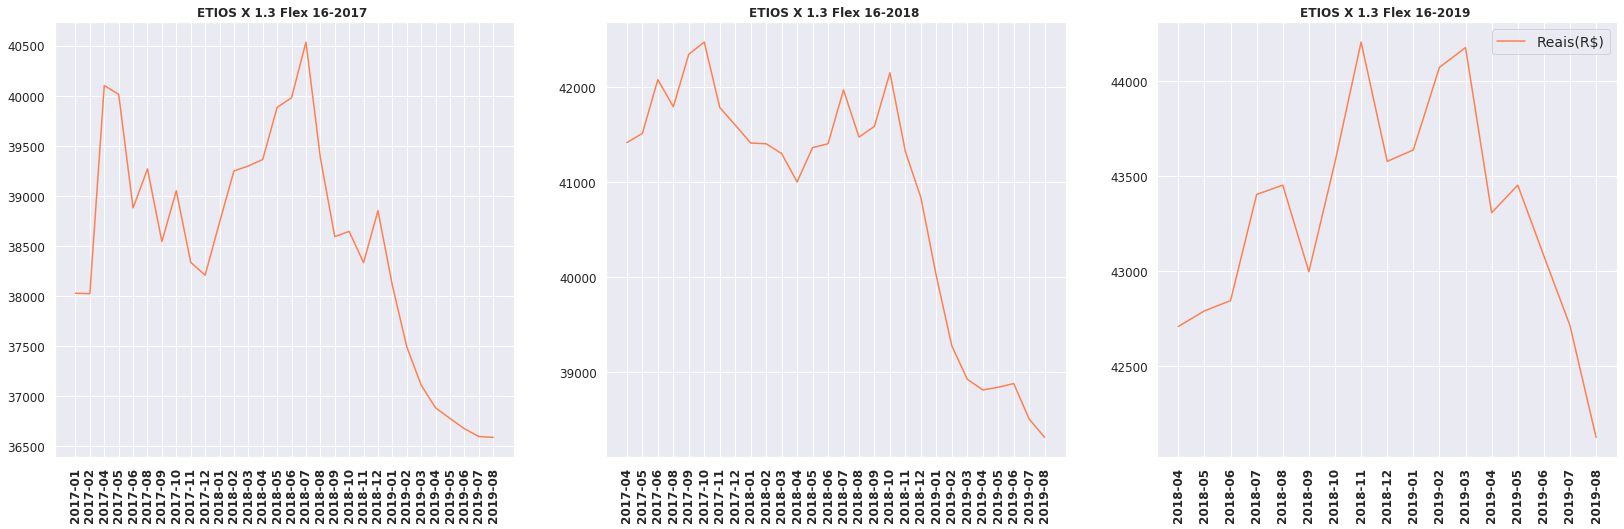

In [124]:
plot_charts(etios_, 'coral')

# --------------------------------------------------------------------------------

In [125]:
onix_ =fipe_carro_recente.query(" Modelo == 'ONIX HATCH LT 1.4 8V FlexPower 5p Mec.'").sort_values(['AnoModelo','Ano','Mes'])
onix_ = onix_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

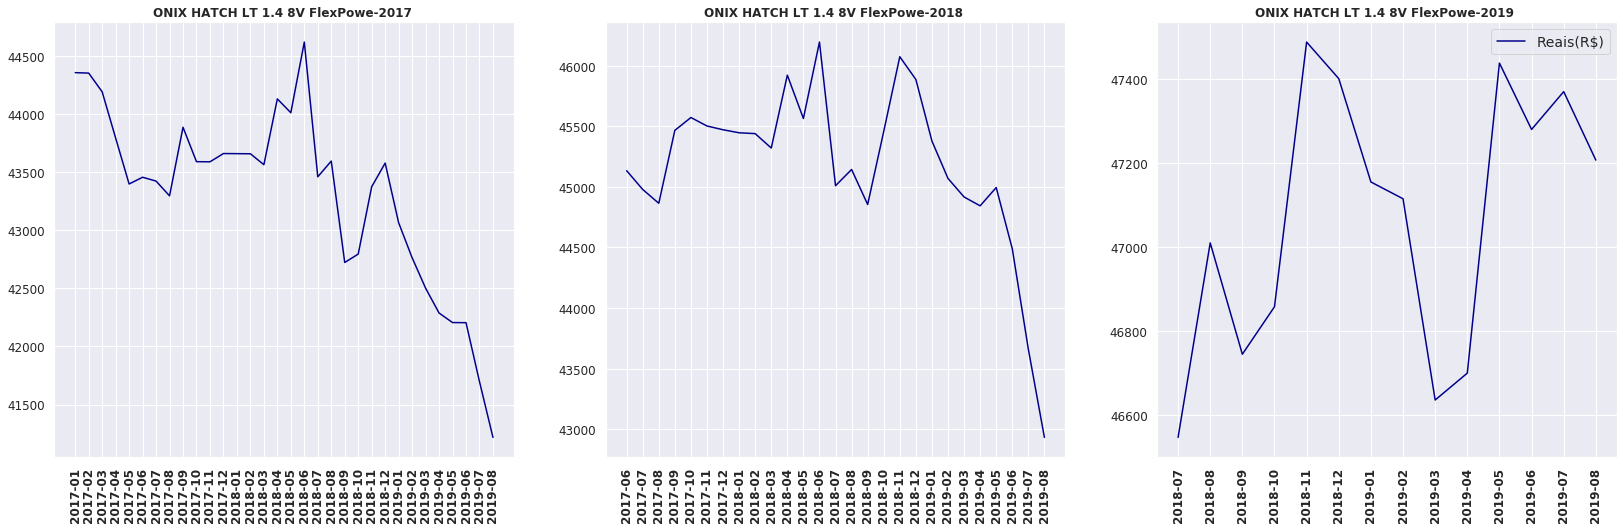

In [126]:
plot_charts(onix_,'darkblue')

# --------------------------------------------------------------------------------

In [127]:
renegage_ = fipe_carro_recente.query(" Modelo == 'Renegade Longitude 1.8 4x2 Flex 16V Aut.'").sort_values(['AnoModelo','Ano','Mes'])
renegage_ = renegage_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

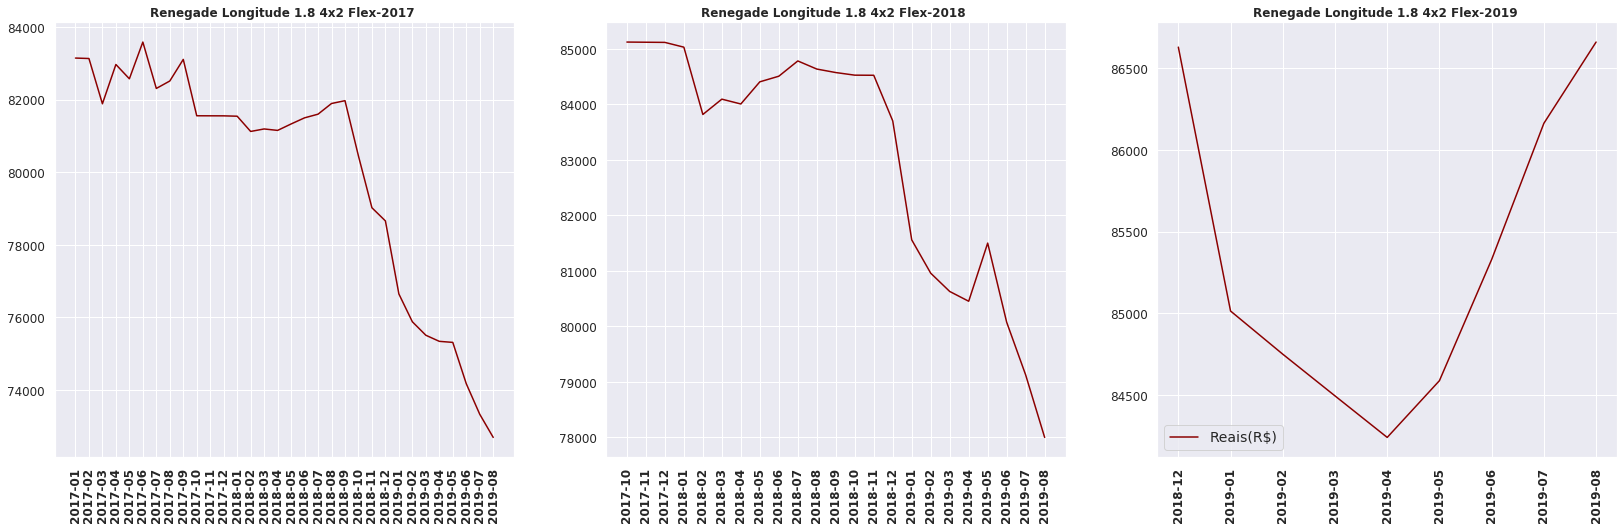

In [128]:
plot_charts(renegage_,'darkred')

# --------------------------------------------------------------------------------

In [129]:
ka_ = fipe_carro_recente.query(" Modelo == 'Ka 1.0 SE/SE Plus TiVCT Flex 5p'").sort_values(['AnoModelo','Ano','Mes'])
ka_ = ka_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

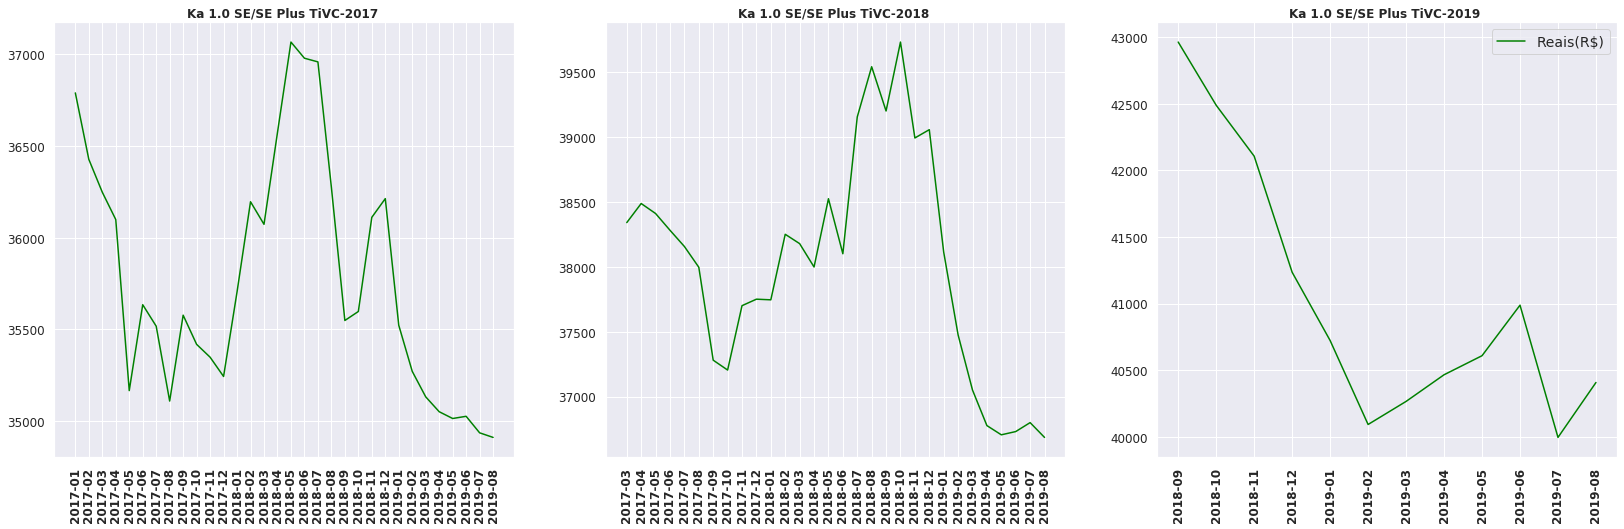

In [130]:
plot_charts(ka_,'green')

# --------------------------------------------------------------------------------

In [131]:
hb_ = fipe_carro_recente.query(" Modelo == 'HB20 C.Style/C.Plus 1.6 Flex 16V Aut.'").sort_values(['AnoModelo','Ano','Mes'])
hb_ = hb_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

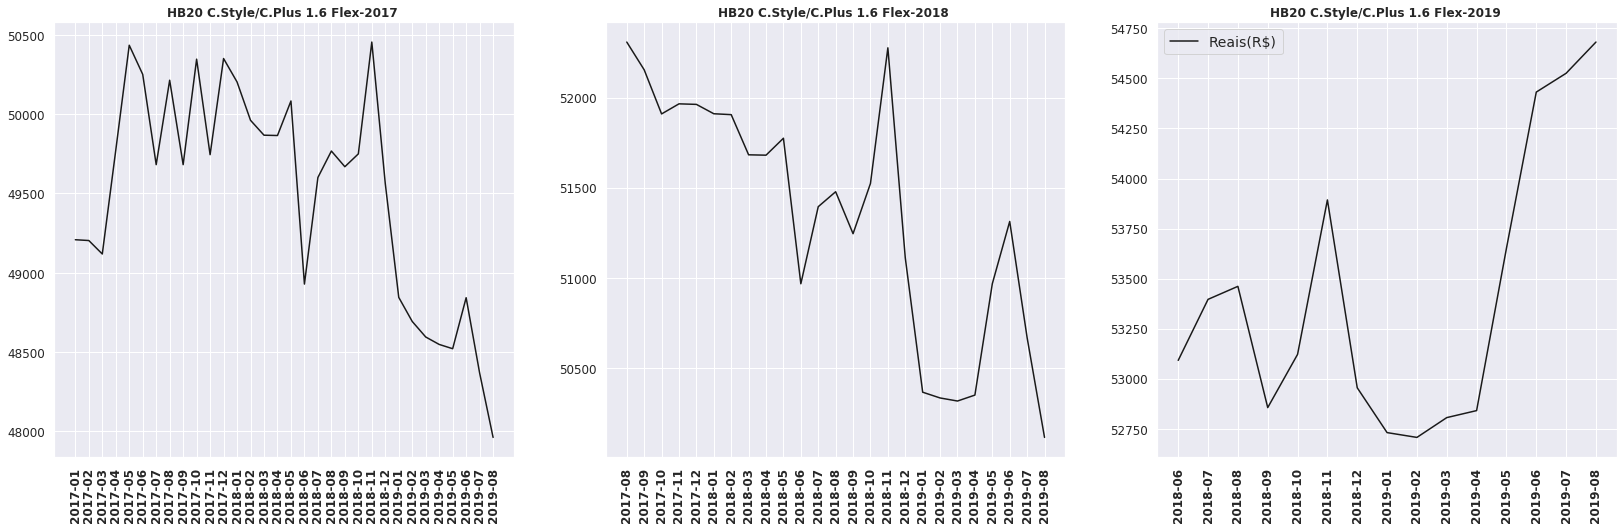

In [132]:
plot_charts(hb_,'k')

In [142]:
# depreciacao apos 12 meses
deprec = {}

for modelo in carros:
    diff = []
    aux = fipe_carro_recente.query(" Modelo == '{}'".format(modelo)).sort_values(['AnoModelo','Ano','Mes'])
    anomodelo = aux.AnoModelo.unique()
    for ano in anomodelo:
        aux2 = aux.query("AnoModelo  =='{}'".format(ano))
        primeiro = aux2.iloc[0].Valor
        ultimo = aux2.iloc[-1].Valor
        diff.append(ultimo - primeiro)
    
    deprec[modelo]=diff

In [146]:
df = pd.DataFrame(deprec)

In [148]:
df = df.transpose()

In [149]:
df.columns = [2017,2018,2019] # ano modelo

In [150]:
df

,2017,2018,2019
Ka 1.0 SE/SE Plus TiVCT Flex 5p,-1877.0,-1655.0,-2554.0
Corolla XEi 2.0 Flex 16V Aut.,-5077.0,-4465.0,-2005.0
S10 Pick-Up LTZ 2.8 TDI 4x4 CD Dies.Aut,-11099.0,-10336.0,-6927.0
ETIOS X Sedan 1.5 Flex 16V 4p Mec.,-2879.0,-772.0,-109.0
SANDERO SPORT RS 2.0 Flex 16V 5p,-4849.0,-4446.0,-2794.0
ONIX HATCH LTZ 1.4 8V FlexPower 5p Mec.,-2130.0,-1987.0,495.0
PRISMA Sed. LTZ 1.4 8V FlexPower 4p,-2051.0,-1325.0,1047.0
HB20 R spec 1.6 Flex 16V Aut.,-3355.0,-1398.0,1658.0
HR-V LX 1.8 Flexone 16V 5p Aut.,-5071.0,-2532.0,-1078.0
Renegade Longitude 1.8 4x2 Flex 16V Aut.,-10452.0,-7119.0,31.0
